# Neural Network Classification with PyTorch

Classification is a prediction process whether something is one or another which can be single or multiple things as yhe options.

This notebook was referenced from **Andrei Neagoie** and **Daniel Bourke**. If you want to know about it you can [click_here](https://github.com/mrdbourke/pytorch-deep-learning)

#1.Making classification datas

In [ ]:
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [ ]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                       "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

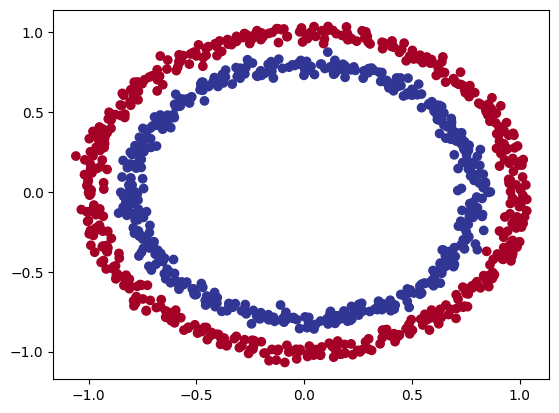

In [ ]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap = plt.cm.RdYlBu);

**Note:** The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practise the fundamentals.

## 1.1 Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


## 1.2 Turn data into tensors and create train and test splits

In [ ]:
# turn data into tensors
import torch
torch.__version__

'2.1.0+cu118'

In [ ]:
X.dtype, type(X)

(dtype('float64'), numpy.ndarray)

In [ ]:
# turn data into tensors
X = torch.from_numpy(X).type(torch.float) # torch's default type is float32 and it must be float32 otherwise it will cause error that's why we call it torch.float!!!!!!!!
y = torch.from_numpy(y).type(torch.float) # torch's default type is float32 and it must be float32 otherwise it will cause error

print(f"X's type is: {type(X)}\n")
print(f"y's type is: {type(y)}")

X[:5], y[:5]

X's type is: <class 'torch.Tensor'>

y's type is: <class 'torch.Tensor'>


(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# Split data into training adn test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2, # 0.2 = %20 of data will be test & %80 will be train
                                                    random_state=42)


In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

#2.Building a model

Building a model to classify our dots

To do so:
1. Setup device agnostic code so code will run on (GPU)
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop


In [ ]:
# importing nn module
from torch import nn

# device agnostic code here
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
!nvidia-smi

Wed Nov  1 20:24:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    30W /  70W |    855MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Device agnostic code has been setup, so here create a model that subclasses of `nn.Module`

1. Subclasses `nn.Module` (almost all models in PyTorch use it)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instantiate an instance of our model class and send it to the target device

In [ ]:
# Construct a model that subclasses nn.Module
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()

    # Create 2 nn.Linear layers
    self.layer_1 = nn.Linear(in_features=2,
                             out_features=5) # first layer's out_features and second layer's in_features must be equal otherwise the code will raise an error
    self.layer_2 = nn.Linear(in_features=5, # !!!!!!!
                             out_features=1)

  # Defining a forward() method
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2

# instantiate an instance model class and send it to device
circle_model = CircleModel().to(device)
circle_model

CircleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(circle_model.parameters()).device, *circle_model.parameters()

(device(type='cuda', index=0),
 Parameter containing:
 tensor([[ 0.5406,  0.5869],
         [-0.1657,  0.6496],
         [-0.1549,  0.1427],
         [-0.3443,  0.4153],
         [ 0.6233, -0.5188]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0',
        requires_grad=True),
 Parameter containing:
 tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0',
        requires_grad=True),
 Parameter containing:
 tensor([-0.2060], device='cuda:0', requires_grad=True))

In [ ]:
# replication the CircleModel using nn.Sequential()
circle_model_v2 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5,out_features=1)).to(device)

circle_model_v2

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
circle_model_v2.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [ ]:
# Predcitions without train
untrained_preds = circle_model_v2(X_test.to(device))
print(f"Lenght of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Lenght of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n {untrained_preds[:10]}")
print(f"\nFirst 10 labels: {y_test[:10]}")

Lenght of predictions: 200, Shape: torch.Size([200, 1])
Lenght of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
 tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0')


## 2.1 Setup loss function and optimizer

which loss function or optimizer should be used ?

Again... this is problem specifix.

Example of MAE or MSE regression to be used (mean absolute error or mean squared error)

However cross entropy or categorical cross entropy is often used for classification

As a reminder, the loss function measures how **wrong** the models predictions are.

And for optimizers, two of the most common and usefull are SGD and Adam, however PyTorch has many built-in options.
* For the loss function we're going to use torch.nn.BCEWithLoss(), for more on what binary crass entropy (BCE) is, [follow the link](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)
* For different optimizers see `torch.optim`


In [ ]:
# setup the loss function
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in

optimizer = torch.optim.SGD(params = circle_model_v2.parameters(),
                            lr = 0.1)

In [1]:
# calculate accuracy - out of 100 examples, what percentage does or model get right ?
def accuracy_calc(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

#3.Train model

To train the model, a training loop must be implemented
1. Forward pass
2. Calculate the loss
3. Optimizer zero_grad
4. loss backward (back proragation)
5. Optimizer step (gradient descent)

## 3.1 Going from raw logits -> prediction probabilities -> prediction labels

The model outputs are going to be raw **logits**

These **logits** can be converted into **prediction probabilities** by passing them to activation function like `sigmoid` for binary crossentropy and `softmax` for multiclass classification.

Then the model's prediction probabilities can be converted to **prediction labels** by either rounding them or taking the `argmax()`.


In [ ]:
# View the first 5 outputs of the forward pass on the test data
circle_model_v2.eval()
with torch.inference_mode():
  y_logits = circle_model_v2(X_test.to(device))[:5]
y_logits

tensor([[-0.2923],
        [-0.1660],
        [-0.2549],
        [-0.3044],
        [ 0.3300]], device='cuda:0')

Our y_logits must be the same format with y_test which is not. So Sigmoid activation function on our model logits has to be used

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# use the sigmoid activation function on our model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4274],
        [0.4586],
        [0.4366],
        [0.4245],
        [0.5818]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5 `y=1` (class 1)
* `y_pred_probs` < 0.5 `y=0` (class 0)

In [ ]:
# find the predicted labels
y_preds = torch.round(y_pred_probs)

# y_pred_labels (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(circle_model_v2(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 1.], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

## 3.2 Building a training and testing loop



In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42) # its not realy necessary

# set the number of epochs
epochs = 100

# put the data to the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# building a train loop
for epoch in range(epochs):
  ## Training
  circle_model_v2.train()

  # 1. forward pass
  y_logits = circle_model_v2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # trun logits -> pred probs -> pred labels

  # 2. calculate loss and accuracy
  loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  accuracy = accuracy_calc(y_true=y_train,
                           y_pred=y_pred)
  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backward
  loss.backward()

  # 5. optimizer step (gradient descent)
  optimizer.step()

  ### testing
  circle_model_v2.eval()
  with torch.inference_mode():
    # 1. forward pass
    test_logits = circle_model_v2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. calculate the test loss and acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_calc(y_true=y_test,
                             y_pred=test_pred)

  # printing the results (epoch, acc, loss, test loss)
  if epoch % 10 == 0:
    print(f"Epoch:  {epoch} | Loss:  {loss:.5f}, Acc:  {accuracy:.2f}% | Test loss:  {test_loss:.5f}, Test acc:  {test_acc:.2f}%")

Epoch:  0 | Loss:  0.70572, Acc:  49.62% | Test loss:  0.70504, Test acc:  51.00%
Epoch:  10 | Loss:  0.70170, Acc:  50.00% | Test loss:  0.70191, Test acc:  51.00%
Epoch:  20 | Loss:  0.69904, Acc:  49.75% | Test loss:  0.69987, Test acc:  51.00%
Epoch:  30 | Loss:  0.69723, Acc:  50.00% | Test loss:  0.69850, Test acc:  50.50%
Epoch:  40 | Loss:  0.69599, Acc:  49.88% | Test loss:  0.69757, Test acc:  52.50%
Epoch:  50 | Loss:  0.69512, Acc:  49.62% | Test loss:  0.69692, Test acc:  52.50%
Epoch:  60 | Loss:  0.69451, Acc:  50.00% | Test loss:  0.69646, Test acc:  49.50%
Epoch:  70 | Loss:  0.69408, Acc:  50.62% | Test loss:  0.69614, Test acc:  49.50%
Epoch:  80 | Loss:  0.69377, Acc:  50.25% | Test loss:  0.69591, Test acc:  48.50%
Epoch:  90 | Loss:  0.69356, Acc:  50.62% | Test loss:  0.69573, Test acc:  49.00%


#4.Make predictions and evaluate the model

According to metrics, it looks like the model is not learning.

To inspect the models capability some predictions and visualization are being impemented in this section. To do so, we're gonna import a function called `plot_decision_boundary()` - To reach the resorce code of `plot_decisipn_boundary()` [click here](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py#L38)


In [ ]:
import numpy as np

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [ ]:
import matplotlib.pyplot as plt

def plot_predictions(
    train_data, train_labels, test_data, test_labels, predictions=None
):
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

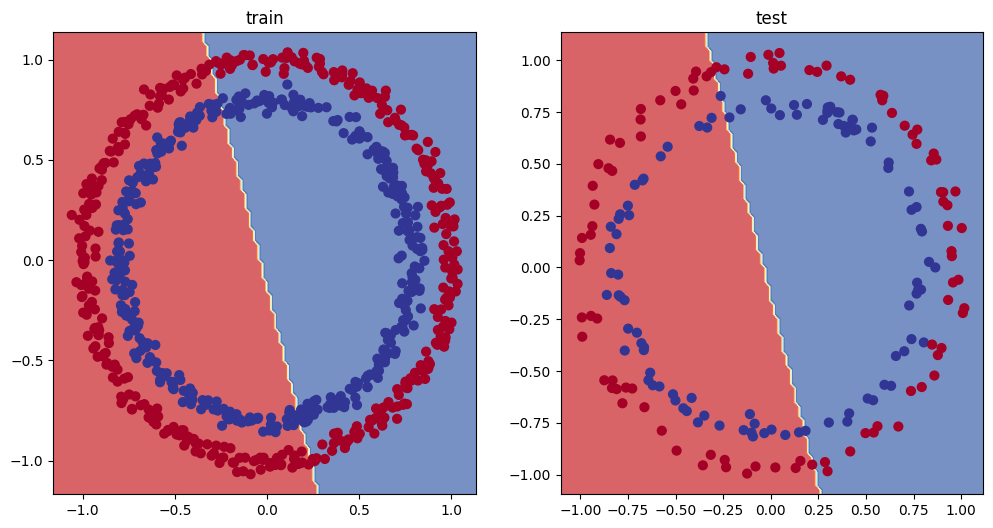

In [ ]:
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(circle_model_v2, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(circle_model_v2, X_test, y_test)

#5.Improving the model

* Adding more layers
* Adding more hidden units
* Changing the activation functions
* Changing the learning rate
* Changing the loss function

All these options are from model's perspective cause of they are dealing directly with the model, not with the data. And they called ***hyperparameters***



In [ ]:
circle_model_v2.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.6123, -0.5883],
                      [ 0.6249,  0.1727],
                      [-0.0492,  0.5926],
                      [ 0.2716, -0.2345],
                      [-0.0780,  0.1525]])),
             ('0.bias', tensor([-0.0023, -0.2574,  0.3843,  0.2986, -0.2002])),
             ('1.weight',
              tensor([[ 0.1330,  0.2890, -0.1805, -0.5019,  0.3121]])),
             ('1.bias', tensor([0.3605]))])

In [ ]:
class CircleModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)

  def forward(self, x):
    #z = self.layer_1(x) #that is an option but we're gonna use a different return way
    #z = self.layer_2(z)
    #z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x))) # this way of implementing is faster than traditional layers connecting where possible behind the scenes

circle_model_v3 = CircleModelV3().to(device)
circle_model_v3

CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
next(circle_model_v3.parameters()).device, next(circle_model_v3.parameters())

(device(type='cpu'),
 Parameter containing:
 tensor([[ 0.5399,  0.5868],
         [-0.1618,  0.6521],
         [-0.1579,  0.1408],
         [-0.3461,  0.4142],
         [ 0.6176, -0.5224],
         [ 0.6211,  0.1368],
         [ 0.5210,  0.0951],
         [ 0.3388, -0.1010],
         [ 0.5338,  0.0974],
         [-0.3410,  0.1731]], requires_grad=True))

In [ ]:
circle_model_v3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [ ]:
# creating a loss function
loss_fn_3 = nn.BCEWithLogitsLoss()

# creating an optimizer
optimizer_3 = torch.optim.SGD(params=circle_model_v3.parameters(),lr=0.1)

In [ ]:
# writing training and testing loop

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# puttuing datas on the gpu
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# training loop
for epoch in range(epochs):
  ### Training
  circle_model_v3.train()

  # forward pass
  y_logits = circle_model_v3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate the loss and acc
  loss = loss_fn_3(y_logits,y_train)
  acc = accuracy_calc(y_true=y_train,y_pred=y_pred)

  # optimizer zero_grad()
  optimizer_3.zero_grad()

  # backpropagation
  loss.backward()

  # optimizer step, gradient descenting
  optimizer_3.step()

  ### Testing
  circle_model_v3.eval()
  with torch.inference_mode():
    # 1. forward pass
    test_logits = circle_model_v3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. calculate the test loss and acc
    test_loss = loss_fn_3(test_logits,
                        y_test)
    test_acc = accuracy_calc(y_true=y_test,
                             y_pred=test_pred)

  # printing the results (epoch, acc, loss, test loss)
  if epoch % 100 == 0:
    print(f"Epoch:  {epoch} | Loss:  {loss:.5f}, Acc:  {acc:.2f}% | Test loss:  {test_loss:.5f}, Test acc:  {test_acc:.2f}%")

Epoch:  0 | Loss:  0.69396, Acc:  50.88% | Test loss:  0.69261, Test acc:  51.00%
Epoch:  100 | Loss:  0.69305, Acc:  50.38% | Test loss:  0.69379, Test acc:  48.00%
Epoch:  200 | Loss:  0.69299, Acc:  51.12% | Test loss:  0.69437, Test acc:  46.00%
Epoch:  300 | Loss:  0.69298, Acc:  51.62% | Test loss:  0.69458, Test acc:  45.00%
Epoch:  400 | Loss:  0.69298, Acc:  51.12% | Test loss:  0.69465, Test acc:  46.00%
Epoch:  500 | Loss:  0.69298, Acc:  51.00% | Test loss:  0.69467, Test acc:  46.00%
Epoch:  600 | Loss:  0.69298, Acc:  51.00% | Test loss:  0.69468, Test acc:  46.00%
Epoch:  700 | Loss:  0.69298, Acc:  51.00% | Test loss:  0.69468, Test acc:  46.00%
Epoch:  800 | Loss:  0.69298, Acc:  51.00% | Test loss:  0.69468, Test acc:  46.00%
Epoch:  900 | Loss:  0.69298, Acc:  51.00% | Test loss:  0.69468, Test acc:  46.00%


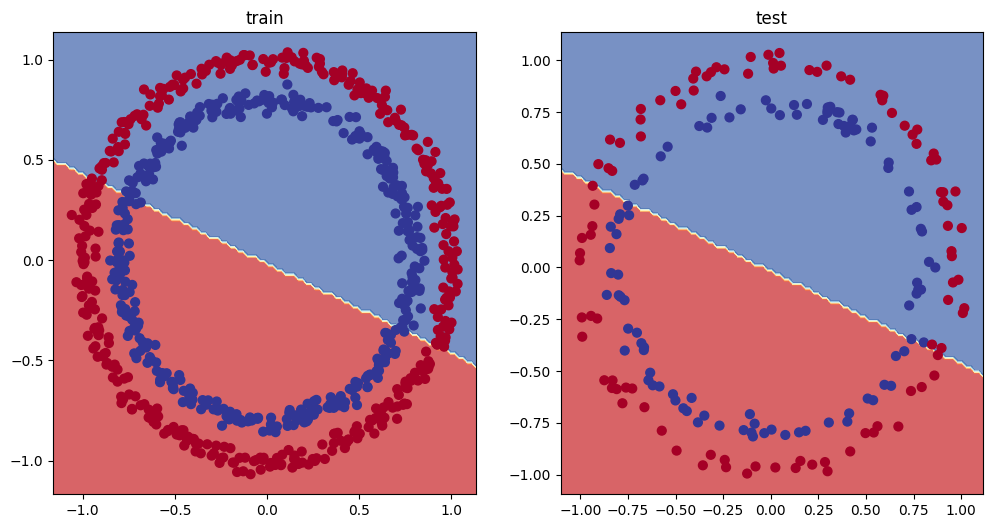

In [ ]:
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(circle_model_v3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(circle_model_v3, X_test, y_test)

## 5.1 Preparing a straight line data to see if the model can fit a straight line


In [ ]:
# create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# create data
X_regression = torch.arange(start,end,step).unsqueeze(dim = 1)
y_regression = weight * X_regression + bias # linear regression formula

# check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression, = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

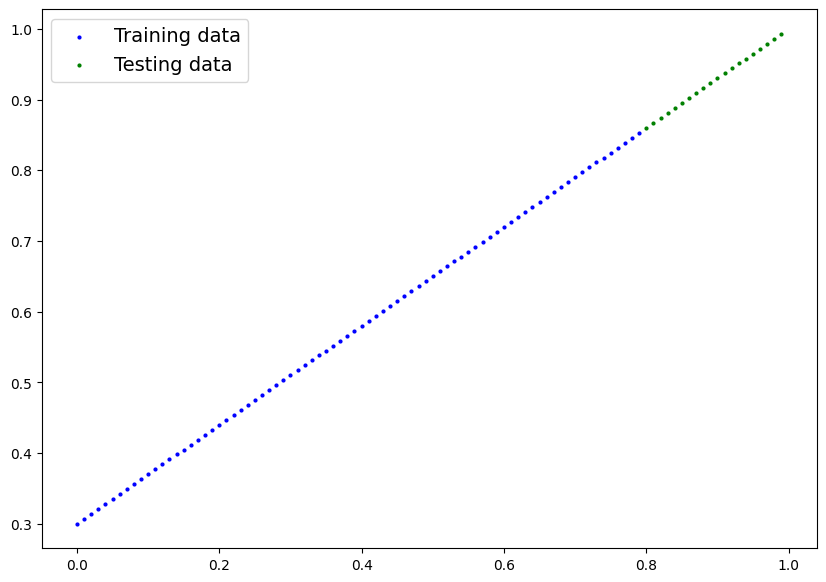

In [ ]:
plot_predictions(train_data = X_train_regression,
                 train_labels = y_train_regression,
                 test_data = X_test_regression,
                 test_labels = y_test_regression)

In [ ]:
circle_model_v3

CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# same architecture as circle_model_v3
circle_model_v4 = nn.Sequential(nn.Linear(in_features=1,out_features=10),
                                nn.Linear(in_features=10,out_features=10),
                                nn.Linear(in_features=10,out_features=1)).to(device)
circle_model_v4

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# loss and optimizer
loss_fn_4 = nn.L1Loss()
optimizer_4 = torch.optim.SGD(params=circle_model_v4.parameters(),
                            lr=0.01)

In [ ]:
#train loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# epoch
epochs = 1000

# put datas on the gpu
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  ### Training
  circle_model_v4.train()

  # forward pass
  y_pred = circle_model_v4(X_train_regression)
  loss = loss_fn_4(y_pred,y_train_regression)
  optimizer_4.zero_grad()
  loss.backward()
  optimizer_4.step()

  ### Testing
  circle_model_v4.eval()
  with torch.inference_mode():
    # 1. forward pass
    test_pred = circle_model_v4(X_test_regression)

    # 2. calculate the test loss and acc
    test_loss = loss_fn_4(test_pred,y_test_regression)


  # printing the results (epoch, acc, loss, test loss)
  if epoch % 100 == 0:
    print(f"Epoch:  {epoch} | Loss:  {loss:.5f} | Test loss:  {test_loss:.5f}")




Epoch:  0 | Loss:  0.06466 | Test loss:  0.12597
Epoch:  100 | Loss:  0.00743 | Test loss:  0.00093
Epoch:  200 | Loss:  0.00621 | Test loss:  0.00123
Epoch:  300 | Loss:  0.00619 | Test loss:  0.00116
Epoch:  400 | Loss:  0.00617 | Test loss:  0.00094
Epoch:  500 | Loss:  0.00646 | Test loss:  0.00138
Epoch:  600 | Loss:  0.00614 | Test loss:  0.00110
Epoch:  700 | Loss:  0.00612 | Test loss:  0.00103
Epoch:  800 | Loss:  0.00641 | Test loss:  0.00149
Epoch:  900 | Loss:  0.00639 | Test loss:  0.00118


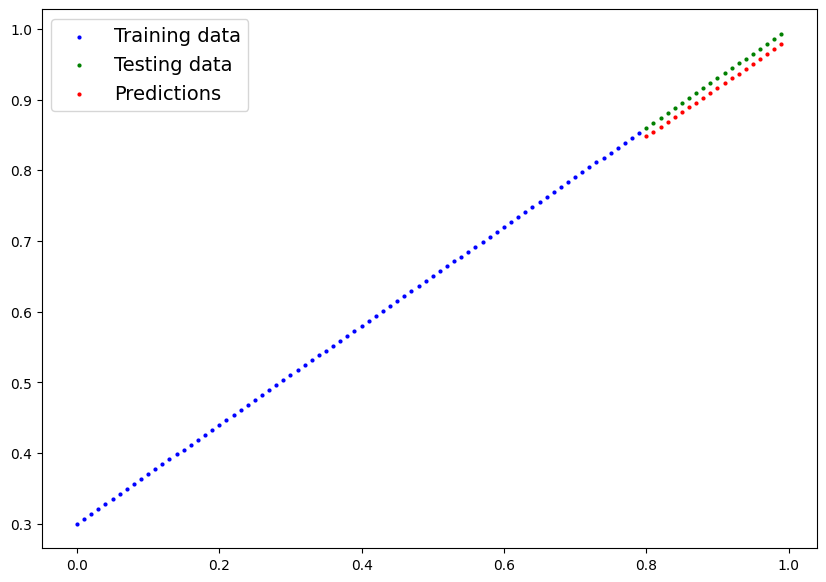

In [ ]:
# turn on evaluation mode
circle_model_v4.eval()

# make predictions (inference)
with torch.inference_mode():
  y_preds = circle_model_v4(X_test_regression)

# plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),train_labels=y_train_regression.cpu(),test_data=X_test_regression.cpu(),test_labels=y_test_regression.cpu(),predictions=y_preds.cpu())

#6.Non-linearity

## 6.1 Recreating non-linear data(red and blue circles)


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


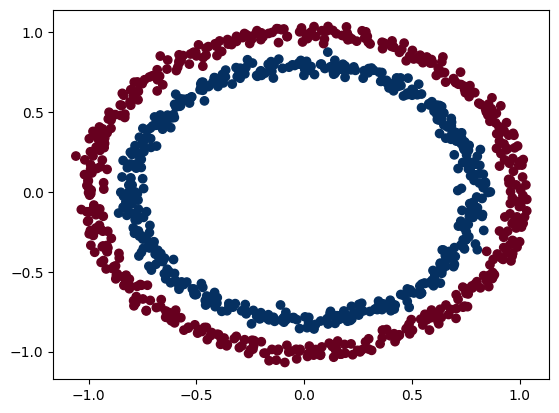

In [ ]:
# make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
print(type(X),type(y))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdBu)

In [ ]:
from sklearn.model_selection import train_test_split
import torch
import numpy as np

# convert data to tensor
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# splitting
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

## 6.2 Building a model with non-linearity

* Linear = straight lines
* Non-linear = non-straight lines

Artificial neural networks are a large combination of linear and non-linear functions which are potentially able to find patterns in data.

In [ ]:
# building a model with non-linear activation functions
class CircleModelV5(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is a non-linear activation function

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x))))) # with using relu activation

circle_model_v5 = CircleModelV5().to(device)
circle_model_v5

CircleModelV5(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
next(circle_model_v5.parameters()).device

device(type='cuda', index=0)

In [ ]:
# setup loss and optimizer
loss_fn_5 = nn.BCEWithLogitsLoss()
optimizer_5 = torch.optim.SGD(params=circle_model_v5.parameters(),
                            lr=0.1)

## 6.3 Training a model with non-linearity

In [ ]:
len(X_test), len(y_test)

(200, 200)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# put datas on the gpu

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# training loop
epochs = 1000

for epoch in range(epochs):
  ### Train
  circle_model_v5.train()

  # forward
  y_logits = circle_model_v5(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate the loss and acc
  loss = loss_fn_5(y_logits,y_train) # BCEWithLogitsLoss uses with logits as input
  acc = accuracy_calc(y_true=y_train,y_pred=y_pred)

  # optimizer zero_grad()
  optimizer_5.zero_grad()

  # backpropagation
  loss.backward()

  # gradient descenting
  optimizer_5.step()

  ### Test
  circle_model_v5.eval()
  with torch.inference_mode():
    test_logits = circle_model_v5(X_test).squeeze() # carefull !!! squeeze() !!!
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn_5(test_logits,y_test)
    test_acc = accuracy_calc(y_true=y_test,y_pred=test_pred)

  # printing the results (epoch, acc, loss, test loss)
  if epoch % 100 == 0:
    print(f"Epoch:  {epoch} | Loss:  {loss:.5f}, Acc:  {acc:.2f}% | Test loss:  {test_loss:.5f}, Test acc:  {test_acc:.2f}%")


Epoch:  0 | Loss:  0.71017, Acc:  50.00% | Test loss:  0.71061, Test acc:  50.00%
Epoch:  100 | Loss:  0.69102, Acc:  51.38% | Test loss:  0.69209, Test acc:  49.50%
Epoch:  200 | Loss:  0.68823, Acc:  63.38% | Test loss:  0.68948, Test acc:  64.00%
Epoch:  300 | Loss:  0.68452, Acc:  64.00% | Test loss:  0.68599, Test acc:  61.50%
Epoch:  400 | Loss:  0.67901, Acc:  65.25% | Test loss:  0.68093, Test acc:  64.00%
Epoch:  500 | Loss:  0.67040, Acc:  72.75% | Test loss:  0.67296, Test acc:  69.00%
Epoch:  600 | Loss:  0.65616, Acc:  79.62% | Test loss:  0.66010, Test acc:  75.50%
Epoch:  700 | Loss:  0.63146, Acc:  86.12% | Test loss:  0.63884, Test acc:  79.50%
Epoch:  800 | Loss:  0.58748, Acc:  91.75% | Test loss:  0.60208, Test acc:  89.50%
Epoch:  900 | Loss:  0.51544, Acc:  95.25% | Test loss:  0.53979, Test acc:  92.50%


## 6.4 Evaluating the trained model that non-linear activation functions

In [ ]:
# predictions
circle_model_v5.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(circle_model_v5(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

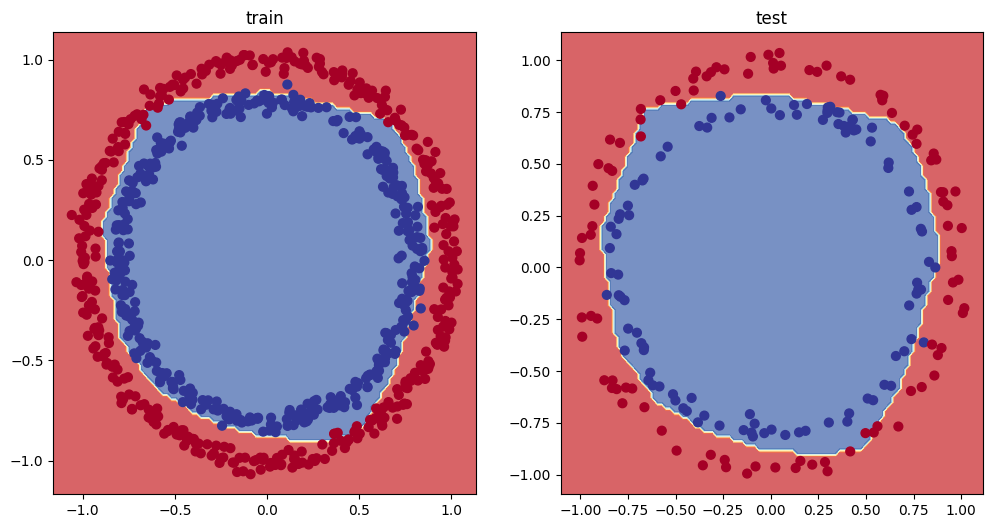

In [ ]:
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(circle_model_v5, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(circle_model_v5, X_test, y_test)

#7.Replicating non-linear activation functions

Neural networks exposes the model what to learn and shows the best tools that which patterns are usefull for the model which are linear and non-linear functions.

In [1]:
# Createing tensor
import torch
import numpy as np
import matplotlib.pyplot as plt

T = torch.arange(-10,10,1,dtype=torch.float32)
T.dtype

torch.float32

In [2]:
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

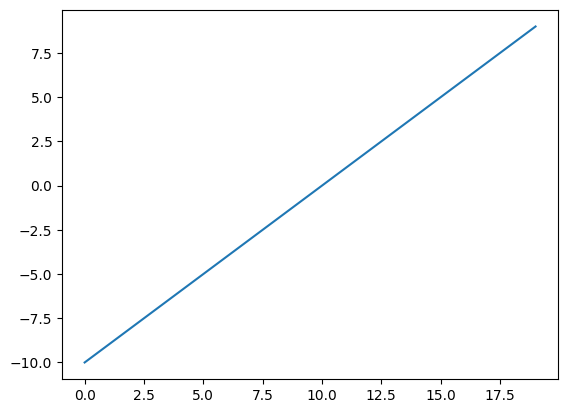

In [3]:
plt.plot(T);

In [4]:
def relu(x:torch.Tensor)-> torch.Tensor:
  assert x.dtype==torch.float32, "incorrect data"
  return(torch.maximum(torch.tensor(0),x))

relu(T)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

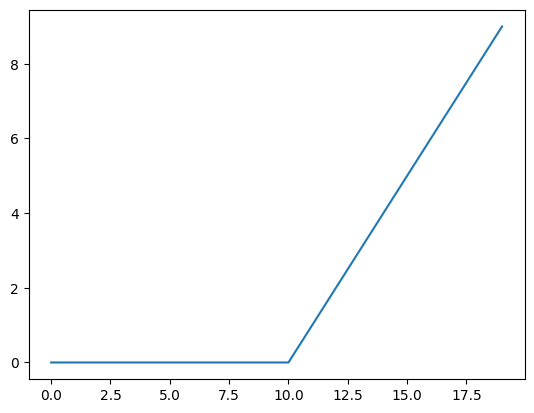

In [5]:
plt.plot(relu(T));

In [6]:
def sigmoid(x:torch.Tensor)-> torch.Tensor:
  assert x.dtype==torch.float32, "incorrect data"
  return 1/(1+torch.exp(-x))

Text(0, 0.5, 'torch.sigmoid')

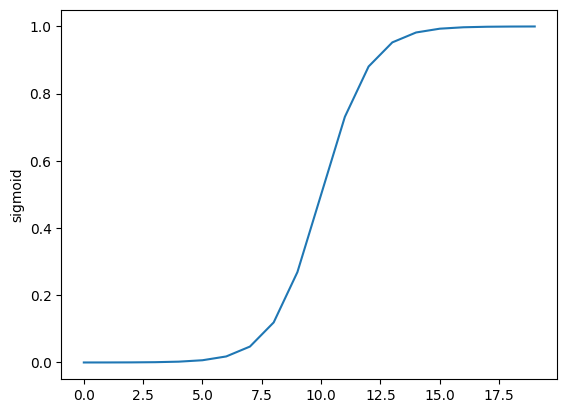

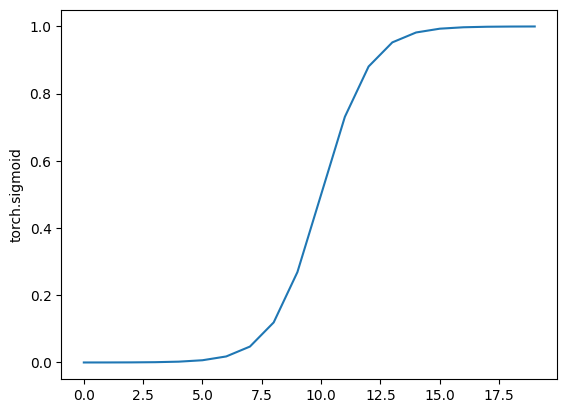

In [7]:
plt.plot(sigmoid(T))
plt.ylabel("sigmoid")
plt.figure()
plt.plot(torch.sigmoid(T));
plt.ylabel("torch.sigmoid")

In [9]:
def softmax(x:torch.Tensor, dim=None)->torch.tensor:
  assert x.dtype == torch.float32, "incorrect data"
  if dim is None:
    x = x - torch.max(x) #numerical stability
    exp_x = torch.exp(x)
    return exp_x / torch.sum(exp_x)
  else:
    x = x - torch.max(x, dim=dim, keepdim=True)[0]
    exp_x = torch.exp(x)
    return exp_x / torch.sum(exp_x, dim=dim, keepdim=True)


<ipython-input-18-8697e2bc421a>:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  plt.plot(torch.nn.functional.softmax(T));


Text(0, 0.5, 'torch.nn.functional.softmax')

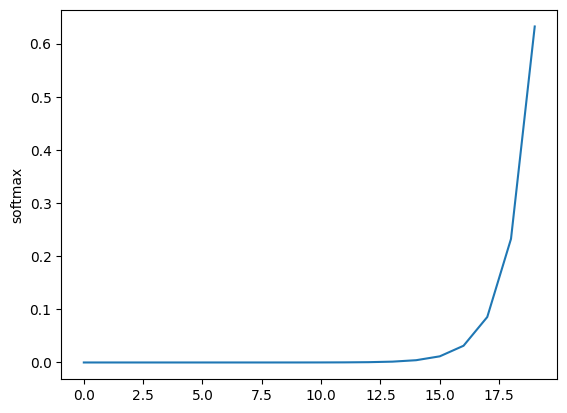

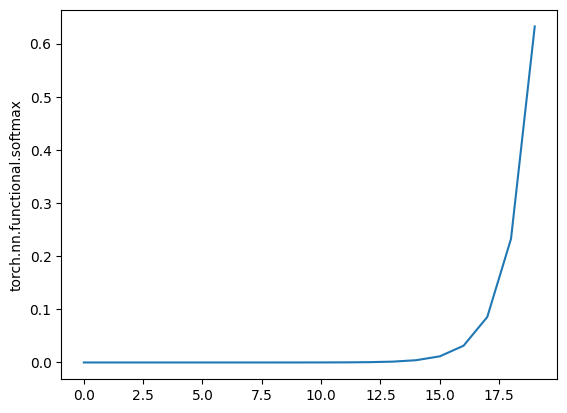

In [18]:
plt.plot(softmax(T));
plt.ylabel("softmax")
plt.figure()
plt.plot(torch.nn.functional.softmax(T));
plt.ylabel("torch.nn.functional.softmax")

# 8.Multi-class classification

* Binary classification(binary_crossentropy) with keras = (1 or 0), (cat or dog), (spam or not spam) and etc.
* Multi-class classification(categorical_crossentropy) with keras = more than one or two classes. (person, cat, dog, plane, bug, plant) and etc.       

## 8.1. Creating multi-class dataset

In [1]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import matplotlib.pyplot as plt

# hyperparameters
# learning rate
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

In [15]:
import numpy as np

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [16]:
import matplotlib.pyplot as plt

def plot_predictions(
    train_data, train_labels, test_data, test_labels, predictions=None
):
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

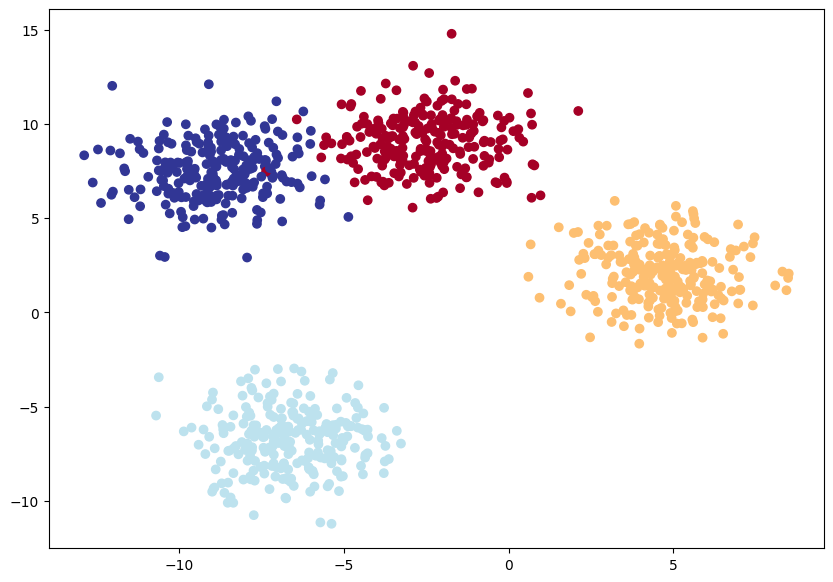

In [2]:
# creating multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor) # !!!!!!!!!! use torch.LongTensor while implementing with Crossentropy otherwise erros may be popup  !!!!! h

# train, test split
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state = RANDOM_SEED)

# plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c = y_blob, cmap=plt.cm.RdYlBu);

## 8.2 Building multi-class classification model

In [3]:
# device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
# model building
class MultiClassModel(nn.Module):
  def __init__(self,input_features, output_features, hidden_units=8):
    """ Initialize multi-class model
    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of outputs features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default 8

    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features))

  def forward(self,x):
    return self.linear_layer_stack(x)

# creating an instance of the model
mlt_model = MultiClassModel(input_features=2,
                            output_features=4,
                            hidden_units=8).to(device)
mlt_model

MultiClassModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

## 8.3 Creating loss and optimizer functions

In [5]:
# loss function
loss_fn = nn.CrossEntropyLoss()
# optimizer
optimizer = torch.optim.SGD(params=mlt_model.parameters(),
                            lr=0.1)

In [6]:
# calculate accuracy - out of 100 examples, what percentage does or model get right ?
def accuracy_calc(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## 8.4 Getting prediction probabilities for the model

In order to evaluate and train and test the model, the models's outputs (logits) have to be converted to prediction probabilities and then to prediction labels.

Logits (raw output of the model) -> Pred probs (torch.softmax) -> Pred labels (takes the argmax of the prediction probabilities)

In [7]:
# put datas on the gpu
X_blob_train, X_blob_test = X_blob_train.to(device), X_blob_test.to(device)
y_blob_train, y_blob_test = y_blob_train.to(device), y_blob_test.to(device)

# getting raw outputs od the model (logits)
mlt_model.eval()
with torch.inference_mode():
  y_logits = mlt_model(X_blob_test)
y_logits[:10]

tensor([[-0.3874,  0.0169,  0.1897, -0.3477],
        [-1.7721, -1.2876,  1.1844, -0.7025],
        [ 1.0806,  0.9599,  0.2908, -0.6997],
        [-0.5067, -0.0486,  0.2262, -0.3929],
        [-1.1886, -0.8252,  0.7970, -0.5297],
        [-2.0123, -1.4875,  1.4210, -0.8148],
        [ 1.0589,  0.9660,  0.2676, -0.7104],
        [-1.3129, -0.9227,  0.8737, -0.5635],
        [ 1.3947,  1.1302,  0.4313, -0.7720],
        [-1.2476, -0.8707,  0.8286, -0.5433]], device='cuda:0')

In [8]:
# converting the model's logits outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits,dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.3874,  0.0169,  0.1897, -0.3477],
        [-1.7721, -1.2876,  1.1844, -0.7025],
        [ 1.0806,  0.9599,  0.2908, -0.6997],
        [-0.5067, -0.0486,  0.2262, -0.3929],
        [-1.1886, -0.8252,  0.7970, -0.5297]], device='cuda:0')
tensor([[0.1880, 0.2817, 0.3348, 0.1956],
        [0.0404, 0.0655, 0.7764, 0.1177],
        [0.3986, 0.3533, 0.1809, 0.0672],
        [0.1729, 0.2734, 0.3599, 0.1938],
        [0.0858, 0.1234, 0.6249, 0.1658]], device='cuda:0')


In [9]:
y_pred_probs.shape

torch.Size([200, 4])

In [10]:
torch.sum(y_pred_probs[0])

tensor(1.0000, device='cuda:0')

In [11]:
torch.max(y_pred_probs[0])

tensor(0.3348, device='cuda:0')

In [12]:
# convert the model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs,dim=1) # dim=1 is based on each row's section. if we called it like dim=0 that would be based on each column's section. !!!!!!!!
y_preds

tensor([2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0,
        0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0,
        0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
        0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2,
        0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2,
        2, 2, 0, 2, 2, 2, 0, 2], device='cuda:0')

In [13]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

## 8.5 Training and testing loop implementations

In [14]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100 # epoch

# training loop
for epoch in range(epochs):
  ### Train
  mlt_model.train()

  # forward
  y_logits = mlt_model(X_blob_train)
  y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

  # calculate the loss
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_calc(y_true=y_blob_train,
                      y_pred=y_pred)

  # optimizer zero_grad()
  optimizer.zero_grad()

  # back propagation
  loss.backward()

  # gradient descenting
  optimizer.step()

  ### Test
  mlt_model.eval()
  with torch.inference_mode():
    # forward
    test_logits = mlt_model(X_blob_test)
    test_preds = torch.softmax(test_logits,dim=1).argmax(dim=1)

    # calculate loss
    test_loss = loss_fn(test_logits,y_blob_test)
    test_acc = accuracy_calc(y_true=y_blob_test,
                             y_pred=test_preds)

  # printing the results (epoch, acc, loss, test loss)
  if epoch % 10 == 0:
    print(f"Epoch:  {epoch} | Loss:  {loss:.5f}, Acc:  {acc:.2f}% | Test loss:  {test_loss:.5f}, Test acc:  {test_acc:.2f}%")




Epoch:  0 | Loss:  1.98351, Acc:  0.00% | Test loss:  1.49823, Test acc:  5.00%
Epoch:  10 | Loss:  0.74845, Acc:  74.88% | Test loss:  0.66377, Test acc:  75.50%
Epoch:  20 | Loss:  0.40370, Acc:  75.25% | Test loss:  0.39619, Test acc:  76.00%
Epoch:  30 | Loss:  0.33457, Acc:  78.50% | Test loss:  0.33651, Test acc:  80.00%
Epoch:  40 | Loss:  0.29235, Acc:  87.38% | Test loss:  0.29357, Test acc:  91.50%
Epoch:  50 | Loss:  0.23825, Acc:  96.62% | Test loss:  0.23521, Test acc:  98.50%
Epoch:  60 | Loss:  0.16834, Acc:  98.50% | Test loss:  0.16175, Test acc:  99.00%
Epoch:  70 | Loss:  0.11129, Acc:  99.12% | Test loss:  0.10442, Test acc:  99.50%
Epoch:  80 | Loss:  0.07909, Acc:  99.12% | Test loss:  0.07251, Test acc:  99.50%
Epoch:  90 | Loss:  0.06191, Acc:  99.12% | Test loss:  0.05528, Test acc:  99.50%


## 8.6 Evaluating and predicting with the trained model

In [17]:
# predictions
mlt_model.eval()
with torch.inference_mode():
  y_logits = mlt_model(X_blob_test)
y_logits[:10]


tensor([[-1.1181,  5.3302, -0.1603, -3.4933],
        [ 1.6555, -5.8387, -7.8253,  5.2957],
        [ 2.6364, -0.4750,  8.7645, -4.7732],
        [-1.7722,  4.5615, -0.9919, -2.1100],
        [ 3.2126, -3.1092, -0.8062, -1.5510],
        [ 1.8146, -6.9473, -9.4820,  6.6219],
        [ 2.5905, -0.4632,  8.5888, -4.6890],
        [ 3.5159, -4.6628, -2.0120, -0.1853],
        [ 2.9183, -0.4787,  9.7466, -5.1298],
        [ 3.3529, -4.0384, -1.5622, -0.6710]], device='cuda:0')

In [19]:
# from logits to prediction probabilities
y_pred_probs = torch.softmax(y_logits,dim=1)
y_pred_probs[:10], y_blob_test

(tensor([[1.5739e-03, 9.9418e-01, 4.1014e-03, 1.4637e-04],
         [2.5576e-02, 1.4227e-05, 1.9513e-06, 9.7441e-01],
         [2.1756e-03, 9.6899e-05, 9.9773e-01, 1.3172e-06],
         [1.7634e-03, 9.9313e-01, 3.8478e-03, 1.2579e-03],
         [9.7247e-01, 1.7473e-03, 1.7479e-02, 8.2998e-03],
         [8.1041e-03, 1.2690e-06, 1.0061e-07, 9.9189e-01],
         [2.4767e-03, 1.1686e-04, 9.9740e-01, 1.7077e-06],
         [9.7186e-01, 2.7268e-04, 3.8627e-03, 2.4000e-02],
         [1.0815e-03, 3.6201e-05, 9.9888e-01, 3.4578e-07],
         [9.7482e-01, 6.0102e-04, 7.1504e-03, 1.7432e-02]], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
         2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
         0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
         3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
         1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3

In [23]:
# from pred probabilities to pred labels
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds[:10],y_blob_test[:10]

(tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'))

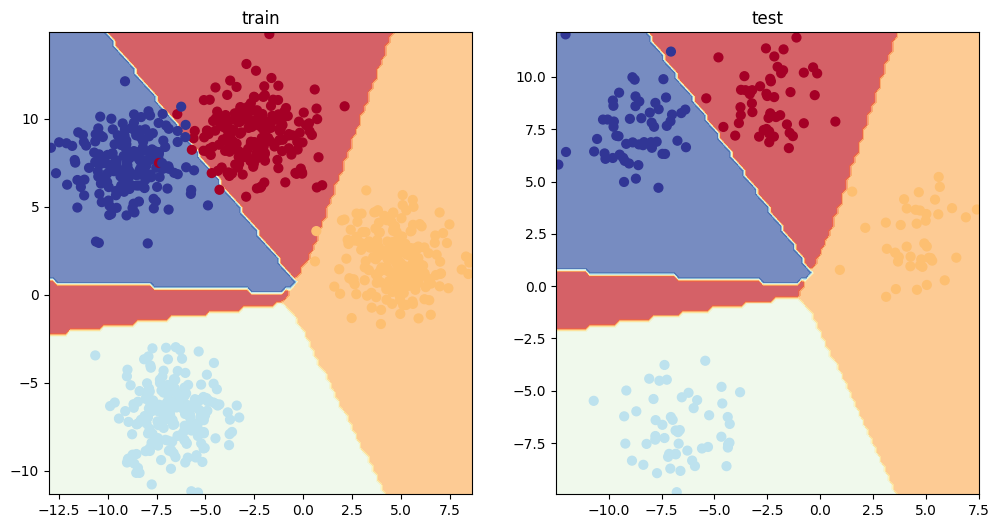

In [24]:
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(mlt_model, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(mlt_model, X_blob_test, y_blob_test)